In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score
import numpy as np

In [2]:
# Загрузка датасета
df = load_iris(as_frame = True).frame
display(df.head())
df.target.value_counts()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


target
0    50
1    50
2    50
Name: count, dtype: int64

In [3]:
# Разметка данных
df['target_virginica'] = df.target.apply(lambda x: 0 if x != 2 else 1)
df['target_virginica'].value_counts()

target_virginica
0    100
1     50
Name: count, dtype: int64

In [4]:
# Подготовка данных
features = df.drop(['target', 'target_virginica'], axis = 1)
target = df['target_virginica']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
# Библиотечная модель логистической регрессии и её обучение
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Accuracy score: 1.0
Precision score: 1.0
f1-measure score: 1.0


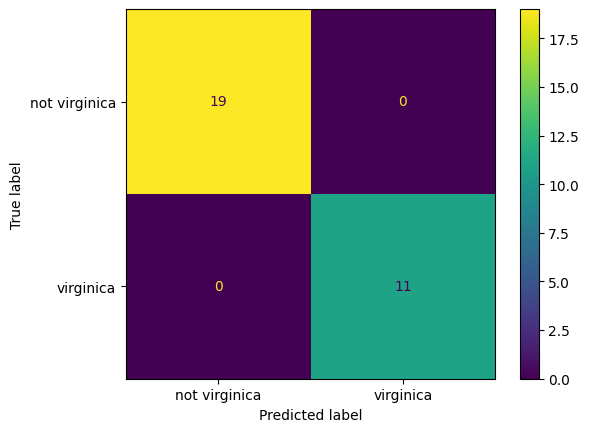

In [6]:
# Предсказания и метрики
y_pred = log_reg.predict(X_val)

print(f'Accuracy score: {accuracy_score(y_val, y_pred)}')
print(f'Precision score: {precision_score(y_val, y_pred)}')
print(f'f1-measure score: {f1_score(y_val, y_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), display_labels=['not virginica', 'virginica']).plot()


Модель получилась точной (на всякий случай проверено, что при большом test_size 100% точность пропадает).

Сгенерируем теперь свой класс MyLogisticRegression.

Accuracy score: 1.0
Precision score: 1.0
f1-measure score: 1.0


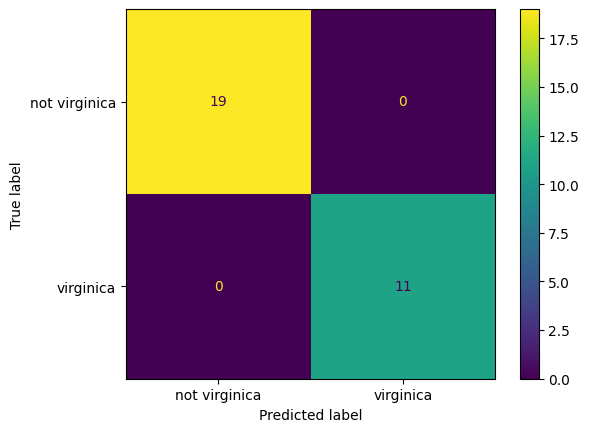

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

class MyLogistic_Regression():
    def __init__(self, step_size, n_iter) -> None:
        self.step_size = step_size
        self.iter = n_iter
    
    def fit(self, X_train, y_train):
        w = np.zeros(X_train.shape[1])
        for i in range(self.iter):
            grad = X_train.to_numpy().T @ (sigmoid(X_train.to_numpy() @ w) - y_train)/X_train.shape[0]
            w -= grad * self.step_size

        self.w = w

    def predict(self, X_val):
        return np.array([1 if sigmoid(self.w @ X_val.iloc[i].to_numpy()) >= 0.5 else 0 for i in range(len(X_val))])



my_model_reg = MyLogistic_Regression(0.01, 10000)
my_model_reg.fit(X_train, y_train)
y_mm_pred = my_model_reg.predict(X_val)

# Анализ результатов предсказаний модели

print(f'Accuracy score: {accuracy_score(y_val, y_mm_pred)}')
print(f'Precision score: {precision_score(y_val, y_mm_pred)}')
print(f'f1-measure score: {f1_score(y_val, y_mm_pred)}')

ConfusionMatrixDisplay(confusion_matrix(y_val, y_mm_pred), display_labels=['not virginica', 'virginica']).plot()
